In [1]:
# 2023.5.1
# reconstructed code 

# no random init
# poly function

In [2]:
import os

cuda_device = '2'

os.environ["CUDA_VISIBLE_DEVICES"] = cuda_device
os.environ['CUBLAS_WORKSPACE_CONFIG']=':4096:8'

import torch

import numpy as np

from para_init import parameters, setup_seed
from permutation import permutation_train



In [3]:
import torch.multiprocessing as mp
num_processes = 10


width_vector = [10, 20, 40, 1280]

# generate a 2-dimensional matrix to hold the results in (i,j)
# result_matrix = torch.zeros((len(width_vector), 10))
result_matrix = np.zeros((len(width_vector), 10, 2))

i = 0

for width in width_vector:
    
    setup_seed(2022)
    
    shared_params = parameters()
    
    shared_params.width = width
    shared_params.adjust_scale = 0
    shared_params.batch_size = 8
    
#     print(shared_params.width)
            
    if __name__ == "__main__":
        
        mp.set_start_method('spawn', force=True)
        
        manager = mp.Manager()
        results_queue = manager.Queue()

        mp.spawn(permutation_train, args=(shared_params, results_queue), nprocs=num_processes, join=True)
        
#         while not results_queue.empty():
#             result = results_queue.get()
#             print(f"Result: {result}")
        
        while not results_queue.empty():
            (idx, (error, error_infty)) = results_queue.get()
#             print(result[0])
#             print(f"Index: {idx}, error: {error}, error_infty: {error_infty}")
            result_matrix[i, idx, :] = [error, error_infty]
    

    i += 1


    

Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!


In [ ]:
print(result_matrix)

[[[8.78020078e-02 4.89855349e-01]
  [2.91382726e-02 4.95469213e-01]
  [6.38351589e-02 8.65856767e-01]
  [7.25854421e-03 1.97295427e-01]
  [1.47529356e-02 4.84700918e-01]
  [3.74149680e-02 4.45130408e-01]
  [1.89825259e-02 3.68107021e-01]
  [7.62724355e-02 4.20770317e-01]
  [3.39898723e-03 2.37575591e-01]
  [2.69874968e-02 3.20876241e-01]]

 [[1.47617413e-02 2.08314061e-01]
  [5.97709883e-03 3.22710693e-01]
  [1.57689694e-02 2.47705221e-01]
  [9.00383480e-03 1.68638647e-01]
  [2.01514829e-02 2.25454092e-01]
  [1.45038795e-02 2.45558262e-01]
  [2.20643524e-02 2.37947091e-01]
  [4.93492931e-03 1.10712051e-01]
  [1.56638175e-02 3.59553456e-01]
  [6.16916874e-03 1.38543457e-01]]

 [[6.90803165e-04 6.02259636e-02]
  [4.21494246e-03 1.16327167e-01]
  [6.73810579e-03 1.25960380e-01]
  [4.66278841e-04 5.16306758e-02]
  [7.24527473e-03 1.67497993e-01]
  [7.93452188e-03 1.41361341e-01]
  [7.24727754e-03 1.37318969e-01]
  [7.59422127e-03 1.61633968e-01]
  [4.13153926e-03 1.25485420e-01]
  [7.76687

(3, 10, 2)
0.4002918319840706
<class 'numpy.ndarray'>
0.0
[0.02476872 0.01144392 0.00395177]
[0.40029183 0.21427237 0.1178535 ]
y_min: [0.00339899 0.00493493 0.00046628]
y_max: [0.08780201 0.02206435 0.00793452]
[[0.02136973 0.00650899 0.0034855 ]
 [0.06303329 0.01062044 0.00398275]]


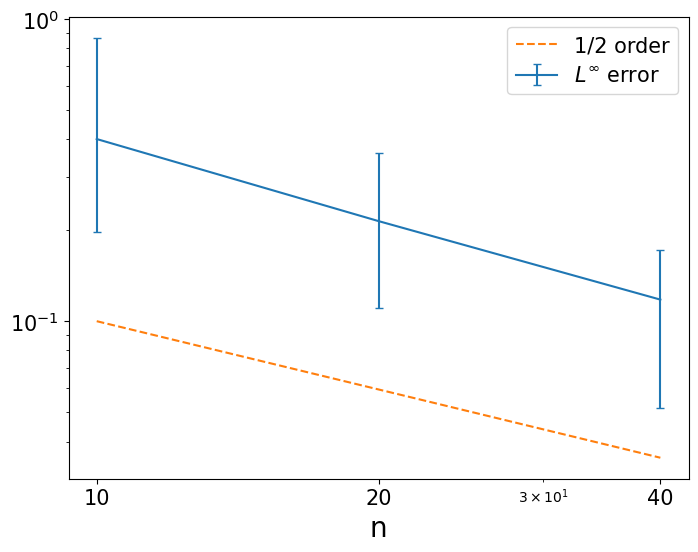

In [ ]:
from statistics import geometric_mean
import matplotlib.pyplot as plt

x = width_vector

print(np.shape(result_matrix))

print(geometric_mean(result_matrix[0,:,1]))

# print(np.average(result_matrix, axis=1))

mean = np.zeros(int(len(x)))
mean_inf = np.zeros(int(len(x)))

print(type(mean))

print(mean[0])

for i in range(len(x)):
    mean[i] = geometric_mean(result_matrix[i,:,0])
    mean_inf[i] = geometric_mean(result_matrix[i,:,1])

# mean = np.average(result_matrix, axis=1)

print(mean)
print(mean_inf)

# mean = geometric_mean(result_matrix, axis=1)

y_max = np.max(result_matrix[:,:,0], axis = 1)
y_min = np.min(result_matrix[:,:,0], axis = 1)

y_min_inf = np.min(result_matrix[:,:,1], axis = 1)
y_max_inf = np.max(result_matrix[:,:,1], axis = 1)

yerr = np.abs(np.vstack((y_min, y_max)) - mean)

print('y_min: '+str(y_min))
print('y_max: '+str(y_max))
print(yerr)

yerr2 = np.abs(np.vstack((y_min_inf, y_max_inf)) - mean_inf)

start_point = 1E-1

x_ref = [x[0], x[-1]]
y_ref = [start_point, start_point/np.sqrt(np.power(2,len(x)))]

# print(np.max(result_matrix, axis = 1))
# print(np.min(result_matrix, axis = 1))

ax = plt.figure(figsize=(8, 6))
# plt.errorbar(x, mean, yerr=yerr, capsize = 3, label='MSE error')
plt.errorbar(x, mean_inf, yerr=yerr2, capsize = 3, label='$L^\infty$ error')
plt.plot(x_ref, y_ref, linestyle='--', label='1/2 order')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('n', size=20)
# plt.ylabel('Loss', size=15)
plt.legend(fontsize=15)
# ax.set_xticks(x)
plt.xticks(x, x, fontsize=15)
plt.yticks(fontsize=15)
# ax()
plt.savefig('plot.pdf', bbox_inches='tight')
plt.show()